Improved SVM


1. Feature Importance Ranking (using Random Forest)
                     Feature  Importance
3                     thalch    0.128898
2                       chol    0.108541
4                    oldpeak    0.100237
0                        age    0.088089
5                         ca    0.084438
1                   trestbps    0.080206
8            cp_asymptomatic    0.053942
23               thal_normal    0.052039
18                exang_True    0.037290
24    thal_reversable defect    0.030729
17               exang_False    0.027012
20                slope_flat    0.026547
21           slope_upsloping    0.023992
14    restecg_lv hypertrophy    0.022504
6                 sex_Female    0.019264
15            restecg_normal    0.017832
7                   sex_Male    0.017559
10            cp_non-anginal    0.016498
13                  fbs_True    0.015285
22         thal_fixed defect    0.011195
12                 fbs_False    0.010946
19         slope_downsloping    0.010751
9   

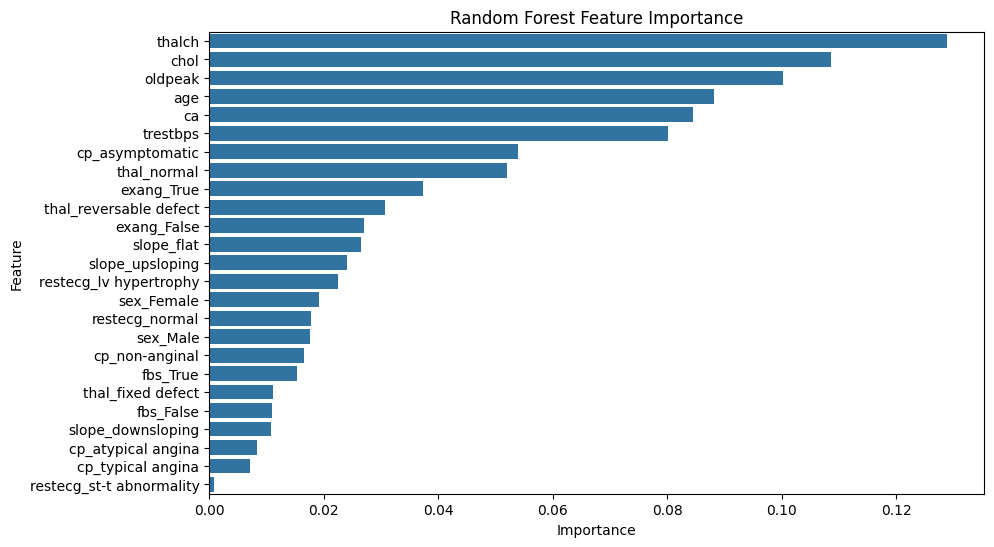


2. Recursive Feature Elimination (RFE)
Selected features by RFE: ['age', 'chol', 'thalch']

3. Chi-Square Test (for Categorical Features)
Selected features by Chi-Square Test: ['chol', 'ca', 'cp_asymptomatic']

4. Final Model with Selected Features

Final Model (Logistic Regression) with features: ['thalch', 'chol', 'oldpeak']
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        35
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3

    accuracy                           0.58        60
   macro avg       0.14      0.20      0.16        60
weighted avg       0.41      0.58      0.48        60



In [ ]:
from sklearn.feature_selection import RFE, chi2, SelectKBest
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 1. Feature Importance with RandomForestClassifier
print("\n1. Feature Importance Ranking (using Random Forest)")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

# Visualize the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Random Forest Feature Importance')
plt.show()


# 2. Recursive Feature Elimination (RFE)
print("\n2. Recursive Feature Elimination (RFE)")
# RFE needs an estimator with feature_importances_ or coef_
# We'll use a RandomForestClassifier as the estimator
rfe_selector = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=3, step=1)
rfe_selector.fit(X_train_scaled, y_train)

rfe_features = X_train.columns[rfe_selector.support_]
print(f"Selected features by RFE: {list(rfe_features)}")


# 3. Chi-Square Test for Feature Significance
print("\n3. Chi-Square Test (for Categorical Features)")


# Select the top K features based on the chi-squared statistic
chi2_selector = SelectKBest(chi2, k=3)
chi2_selector.fit(X_train.abs(), y_train) # Use .abs() to ensure non-negative for this demo

chi2_features = X_train.columns[chi2_selector.get_support()]
print(f"Selected features by Chi-Square Test: {list(chi2_features)}")


# 4. Use the Most Relevant Features for Modeling
print("\n4. Final Model with Selected Features")
# Let's use the top 3 features from the Random Forest Importance scores
selected_features = feature_importances['Feature'][:3].tolist()

# Train a new model (e.g., Logistic Regression) with only these features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Scale the new feature set
scaler_final = StandardScaler()
X_train_final = scaler_final.fit_transform(X_train_selected)
X_test_final = scaler_final.transform(X_test_selected)

final_model = LogisticRegression(solver='saga', max_iter=1000, random_state=42)
final_model.fit(X_train_final, y_train)

y_pred_final = final_model.predict(X_test_final)
print(f"\nFinal Model (Logistic Regression) with features: {selected_features}")
print(classification_report(y_test, y_pred_final, zero_division=0))